In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_market=StandardScaler().fit_transform(market_data_df)
scaled_market[:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [7]:
# Create a DataFrame with the scaled data
scaled_market_df=pd.DataFrame(scaled_market,index=market_data_df.index)

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
scaled_market_df.head()

,0,1,2,3,4,5,6
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
scaled_list=list(range(1,11))

# Create an empty list to store the inertia values
scaled_empty=[]

# Create a for loop to compute the inertia with each possible value of k
for i in scaled_list:
    kmeans=KMeans(n_clusters=i, n_init="auto")
    
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters

# 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_market_df)
# 3. Append the model.inertia_ to the inertia list
    scaled_empty.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
data_create={"k":scaled_list,"inertia":scaled_empty}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df=pd.DataFrame(data_create)

# Display the DataFrame
elbow_df

C:\Users\brian\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\brian\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\brian\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\brian\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,147.429981
3,4,79.022435
4,5,66.413051
5,6,53.617387
6,7,48.885131
7,8,37.423470
8,9,32.617957
9,10,28.653934


<Axes: xlabel='k'>

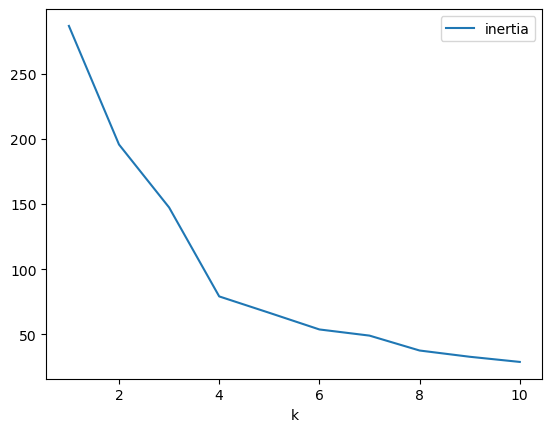

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k",y="inertia")


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [13]:
# Initialize the K-Means model using the best value for k
best_value=KMeans(n_clusters=4,n_init="auto")

In [14]:
# Fit the K-Means model using the scaled data
best_value.fit(scaled_market_df)

C:\Users\brian\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto')

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_prediction=best_value.predict(scaled_market_df)

# View the resulting array of cluster values.
print(cluster_prediction)

[2 2 3 3 2 2 2 2 3 3 0 3 3 2 3 3 3 3 2 3 0 2 3 3 3 3 3 0 2 3 3 3 1 3 0 0 2
 0 3 3 0]


In [16]:
# Create a copy of the DataFrame
copy_market_df=market_data_df.copy()

In [17]:
# Add a new column to the DataFrame with the predicted clusters
copy_market_df["crypto_cluster"]=cluster_prediction

# Display sample data
copy_market_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,3
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,3
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,2
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,2
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,2
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,3


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

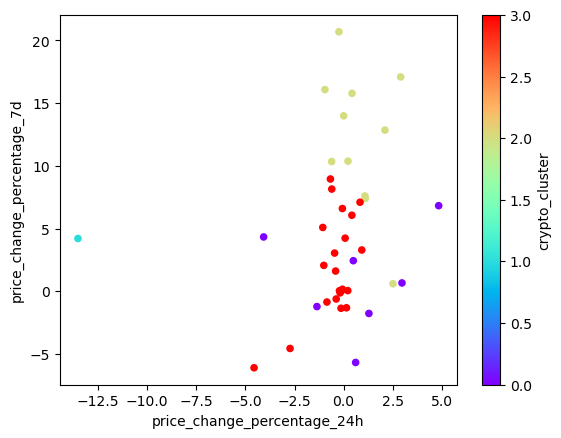

In [93]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
copy_market_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    colormap="rainbow"
)

### Optimize Clusters with Principal Component Analysis.

In [25]:
# Create a PCA model instance and set `n_components=3`.
pca_model=PCA(n_components=3)


In [27]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_fit=pca_model.fit_transform(scaled_market_df)

# View the first five rows of the DataFrame. 
pca_fit[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [31]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca_model.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  0.89503166

In [43]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_df=pd.DataFrame(pca_fit,columns=["PCA1","PCA2","PCA3"])
# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data
pca_df["coin_id"]=market_data_df.index

# Set the coinid column as index
pca_df=pca_df.set_index("coin_id")

# Display sample data
pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [46]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
kpca_list=list(range(1,11))

# Create an empty list to store the inertia values
pca_inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in kpca_list:
    kmeanspca=KMeans(n_clusters=i,n_init="auto")
    kmeanspca.fit(pca_df)
    pca_inertia.append(kmeanspca.inertia_)
    
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
pca_data_dict={"k":kpca_list,"inertia":pca_inertia}

# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df=pd.DataFrame(pca_data_dict)

# Display the DataFrame
elbow_pca_df.head(3)

C:\Users\brian\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\brian\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\brian\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\brian\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,118.061554


<Axes: xlabel='k'>

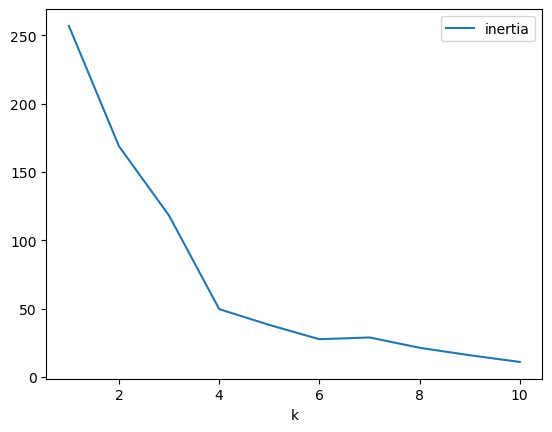

In [48]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_df.plot.line(x="k",y="inertia")

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
    4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, its still 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [50]:
# Initialize the K-Means model using the best value for k
pca_k=KMeans(n_clusters=4,n_init="auto")

In [52]:
# Fit the K-Means model using the PCA data
pca_k.fit(pca_df)

C:\Users\brian\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto')

In [54]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_pca=pca_k.predict(pca_df)

# Print the resulting array of cluster values.
crypto_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 3, 1, 0, 1, 2, 0, 1, 1, 0])

In [64]:
# Create a copy of the DataFrame with the PCA data
crypto_copy_df=pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_copy_df["crypto_clusters"]=crypto_pca

# Display sample data
crypto_copy_df.head(11)

,PCA1,PCA2,PCA3,crypto_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,1
ripple,-0.471835,-0.222660,-0.479053,1
bitcoin-cash,-1.157800,2.041209,1.859715,1
binancecoin,-0.516534,1.388377,0.804071,1
chainlink,-0.450711,0.517699,2.846143,1
cardano,-0.345600,0.729439,1.478013,1
litecoin,-0.649468,0.432165,0.600303,1


<Axes: xlabel='PCA1', ylabel='PCA2'>

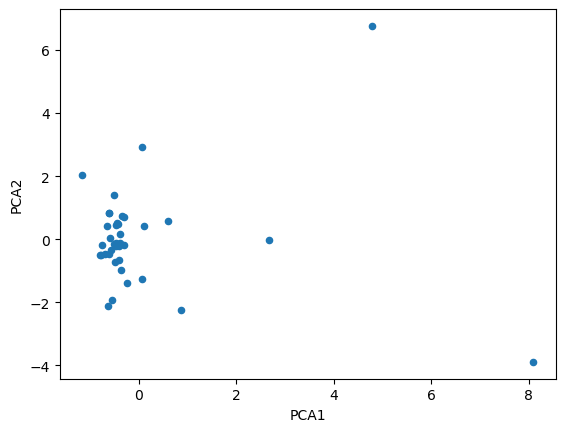

In [68]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
crypto_copy_df.plot.scatter(x="PCA1",y="PCA2")

### Determine the Weights of Each Feature on each Principal Component

In [70]:
# Use the columns from the original scaled DataFrame as the index.
pd.DataFrame(pca_model.components_.T,columns=["PCA1","PCA2","PCA3"])

,PCA1,PCA2,PCA3
0,-0.416728,0.358162,-0.218795
1,-0.102432,0.227432,0.787670
2,-0.009162,0.540415,0.349534
3,0.191523,0.562182,-0.181744
4,0.320365,0.434040,-0.361377
5,0.594468,0.027735,0.039733
6,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

    0 is PCA1
    1 is PCA3
    2 is PCA2
    3 is PCA2
    4 is PCA2
    5 is PCA1
    6 is PCA1